In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# để hiển thị đẹp
pd.set_option("display.max_columns", None)

df = pd.read_csv("../data/telco_churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.shape      # số dòng, số cột
df.info()     # kiểu dữ liệu từng cột, có null không
df.describe() # thống kê cơ bản cho cột số


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [22]:
df["Churn"].value_counts()
# map Yes/No -> 1/0
df["Churn"] = (df["Churn"] == "Yes").astype(int)

# convert TotalCharges sang số, lỗi thì cho NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# xem lại info sau khi đổi
df[["TotalCharges", "MonthlyCharges", "tenure", "Churn"]].info()

df.isna().sum().sort_values(ascending=False)

df = df.dropna(subset=["TotalCharges"]).reset_index(drop=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TotalCharges    7032 non-null   float64
 1   MonthlyCharges  7043 non-null   float64
 2   tenure          7043 non-null   int64  
 3   Churn           7043 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


In [23]:
df["Churn"].value_counts()

df["Churn"].value_counts(normalize=True) * 100


Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

In [24]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_cols, categorical_cols


(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'],
 ['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])

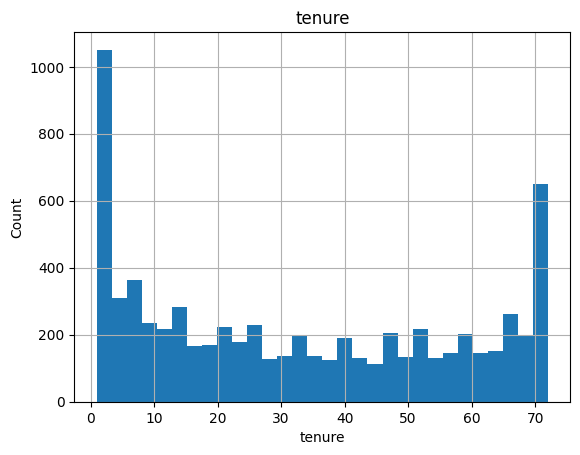

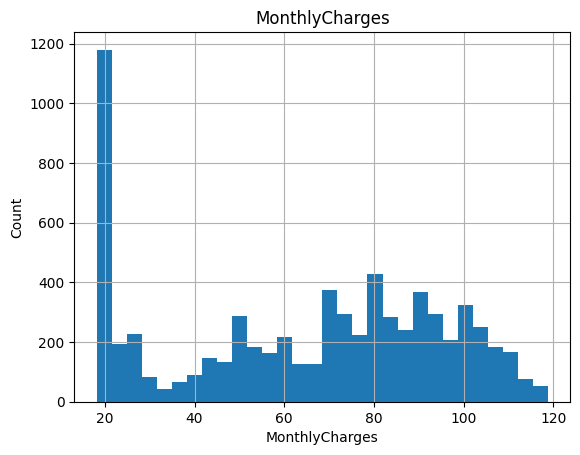

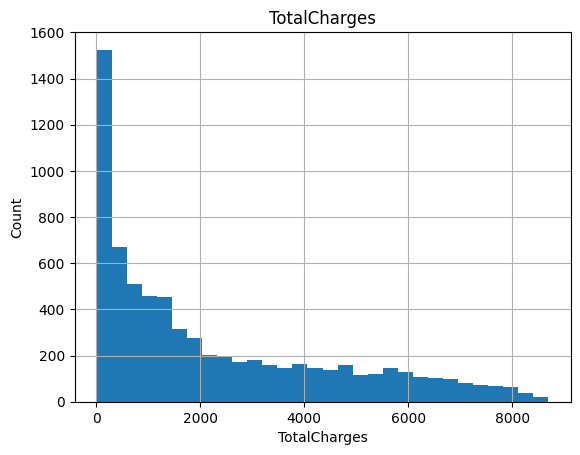

In [25]:
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    df[col].hist(bins=30)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    df.groupby("Churn")[["tenure", "MonthlyCharges", "TotalCharges"]].mean()



Churn                   0          1
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


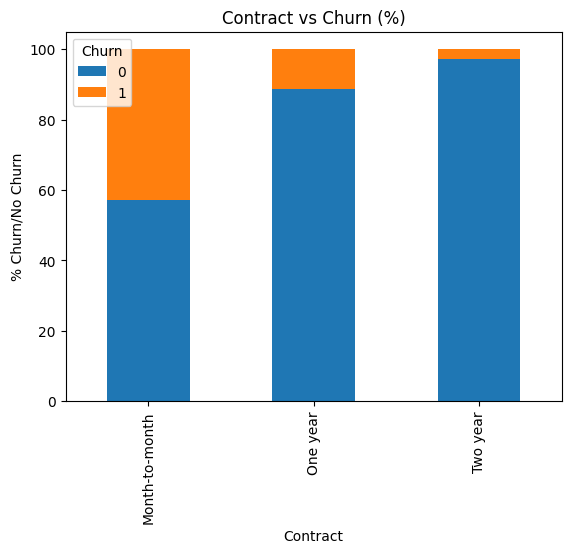

Churn                    0          1
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


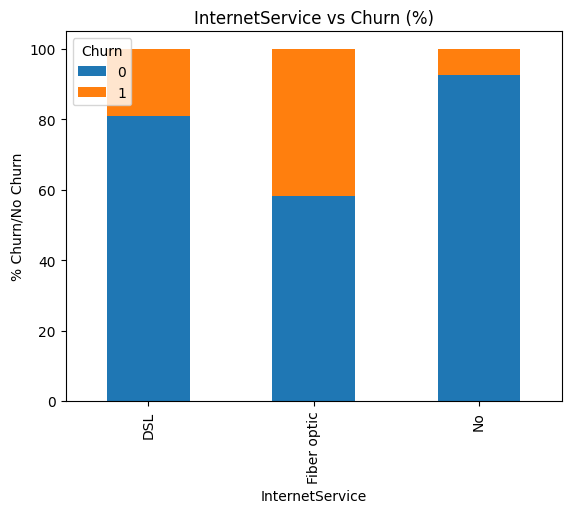

Churn                              0          1
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


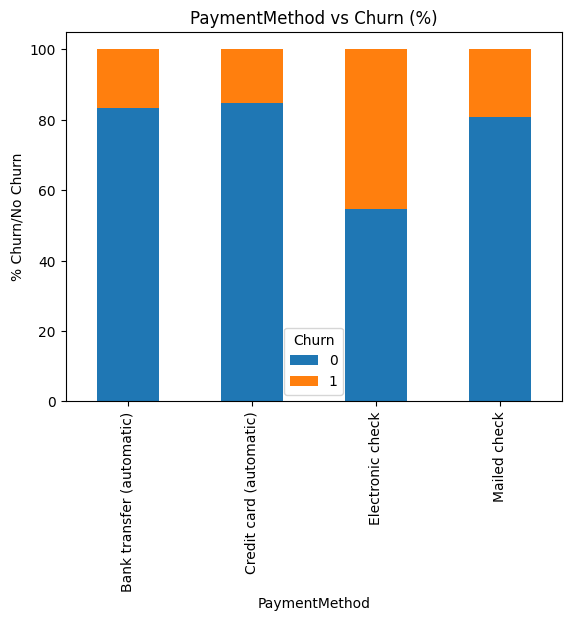

Churn                  0          1
SeniorCitizen                      
0              76.349745  23.650255
1              58.318739  41.681261


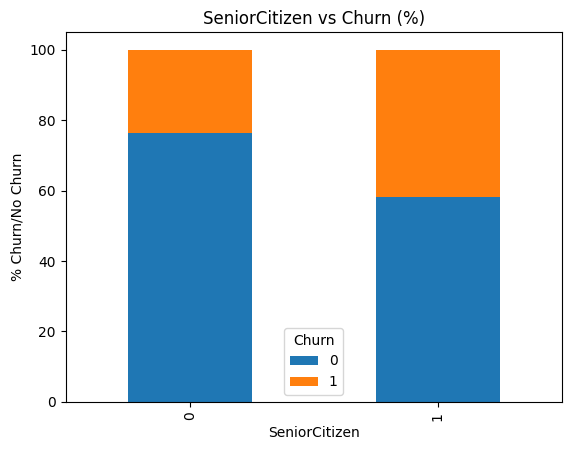

In [26]:
def plot_cat(col):
    ct = pd.crosstab(df[col], df["Churn"], normalize="index") * 100
    print(ct)
    ct.plot(kind="bar", stacked=True)
    plt.title(f"{col} vs Churn (%)")
    plt.ylabel("% Churn/No Churn")
    plt.show()

for col in ["Contract", "InternetService", "PaymentMethod", "SeniorCitizen"]:
    plot_cat(col)


In [27]:
corr = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]].corr()
corr


,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.354049,0.192858,-0.199484,1.000000


In [28]:
target_col = "Churn"
drop_cols = ["customerID"]  # có thể thêm nếu bạn muốn bỏ cột nào khác

feature_cols = [c for c in df.columns if c not in [target_col] + drop_cols]

numeric_features = [c for c in feature_cols if c in numeric_cols]
categorical_features = [c for c in feature_cols if c in categorical_cols]

feature_cols, numeric_features, categorical_features


(['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'],
 ['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])